# Méthode d'Euler en élec, épisode I

Dans ce notebook, on va détailler un peu le principe derrière la méthode d'Euler pour pour pouvoir intégrer (de manière un peu rustique mais tout de même fort utile) une équation différentielle dont on se limite pour le moment au premier ordre (on verra dans un futur épisode comment transformer une équadiff d'ordre $n$ en $n$ équadiffs d'ordre 1).

Comme chaque épisode introductif, on commence par une première partie théorique à lire, suivie d'une partie pratique courte qui sera développée dans les prochains épisodes.

Comme d'habitude, il faudra fournir votre réponse dans la variable `reponse` en toute fin de notebook et bien lire ce qu'on vous demande d'y mettre.

## Première partie, bases théoriques

La méthode d'Euler est la base de tout méthode d'intégration numérique d'équation différentielle. C'est un peu comme la roue pour une formule 1: avoir la roue ne suffit pas à avoir une formule 1, mais sans roue, point de formule 1 du tout. La méthode d'Euler est donc la «plus mauvaise» méthode d'intégration numérique, mais c'est celle qui donne l'idée qui se cache derrière toute les autres et est la plus simple à mettre en œuvre. Il est donc important de regarder un peu ce qui se cache sous le capot.

### Ce qu'on veut intégrer

La méthode d'Euler sert à intégrer une équation différentielle du premier ordre du type
$$
\frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t)
$$
où $f$ est une fonction qui dépend à la fois de la fonction inconnue $y(t)$ et de la variable temporelle $t$ dont ladite fonction $y$ dépend. Notez au passage qu'on utilise $t$ parce que souvent on veut voir l'évolution au cours du temps, mais rien n'empêche  d'avoir un autre nom de variable comme pour l'équation de l'hydrostatique où l'on aurait
$$
\frac{\mathrm{d}P}{\mathrm{d}z} = f(P, z)
$$

### Comment procéder ?

La procédure est relativement intuitive quand on interprète la dérivée $\frac{\mathrm{d}y}{\mathrm{d}t}$ comme le rapport du petit incrément $\mathrm{d}y$ de la grandeur $y$ pendant le petit intervalle de temps $\mathrm{d}t$: cela donne (approximativement) de combien $y$ va varier durant $\mathrm{d}t$. L'équation différentielle se réécrit alors, si on multiplie par $\mathrm{d}t$ de part et d'autre,
$$
\mathrm{d}y \approx f(y, t)\,\mathrm{d}t
$$
et la nouvelle valeur de $y$ (celle en $t+\mathrm{d}t$) correspond (à peu près) à l'ancienne (celle en $t$) à laquelle on ajoute $\mathrm{d}y$:
$$
y(t + \mathrm{d}t) = y(t) + \mathrm{d}y 
    \approx y(t) + f(y(t), t)\,\mathrm{d}t
$$
Pour avancer dans le temps, il suffira d'y aller par pas de $\mathrm{d}t$ en $\mathrm{d}t$ et de calculer l'évolution de $y$ de proche en proche en utilisant à chaque fois la dernière valeur connue de $y$ (celle en $t$) pour calculer la suivante (celle en $t + \mathrm{d}t$)

### Y plus qu'à...

En pratique, de quoi a-t-on besoin ? 

* On doit disposer d'une valeur initiale pour $y(t_0)$ à l'instant $t_0$ où l'on commence à regarder (on choisit souvent $t_0=0$, mais ce n'est pas une obligation), 
* on a aussi besoin d'avoir à disposition cette fameuse fonction $f(y, t)$ qui peut finalement ne pas dépendre du temps. Par exemple pour l'équation différentielle
$$
\frac{\mathrm{d}y}{\mathrm{d}t} = - \frac1\tau\,y
$$
on a simplement $f(y, t) = - \frac1\tau\,y$.
* Et finalement on doit se choisir un pas de temps $\mathrm{d}t$ suffisamment petit pour que les erreurs successives ne soient pas trop grandes et se débrouiller pour stocker les valeurs des temps successifs qui correspondent aux $y$ successifs qu'on aura calculé.

### Exemple de $\frac{\mathrm{d}y}{\mathrm{d}t} = - \frac1\tau\,y$ avec $y(0) = 10$


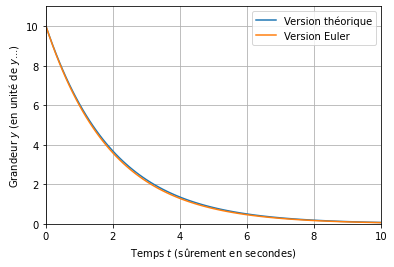

In [1]:
import numpy as np              # Pour avoir des np.array
import matplotlib.pyplot as plt # Pour faire le dessin à la fin

dt = 1e-1
t0 = 0
y0 = 10
tau= 2
tmax = 5 * tau # On va intégrer jusqu'à 5\tau
N = int((tmax-t0) / dt) # Pour savoir le nombre de places à prévoir

# On prépare les contenants qui stockeront les valeurs calculées
# le "+1" correspond à la valeur initiale
T = np.zeros(N+1)
Y = np.zeros(N+1)

# On impose les valeurs initiales
T[0] = t0
Y[0] = y0

def f(y, t):
    """
    La fonction en question ne dépend que de y,
    mais ce sera plus facile à généraliser quand on aura
    un second membre non constant dans les prochains épisodes.
    En outre, informatiquement, il n'est pas abhérent de demander
    une variable (ici t) et finalement ne pas l'utiliser si cela
    simplifie une généralisation future.
    """
    return - 1 / tau * y

# La boucle de calcul proprement dite dans laquel chaque Y est calculé
# à partir de celui d'avant.
for i in range(1, N+1):
    # On utilise les valeurs précédentes pour calculer l'incrément
    dy = f(Y[i-1], T[i-1]) * dt
    # et on le rajoute à la valeur précédente pour avoir la nouvelle
    Y[i] = Y[i-1] + dy 
    # Le temps s'incrémente aussi d'un pas
    T[i] = T[i-1] + dt 

# On peut à présent représenter notre solution ainsi que la solution
# connue du cours en y0 * exp(-t/tau)

theorique = y0 * np.exp(-T / tau)
plt.plot(T, theorique, label = 'Version théorique')
plt.plot(T, Y, label = 'Version Euler')
plt.xlabel('Temps $t$ (sûrement en secondes)')
plt.ylabel('Grandeur $y$ (en unité de $y$...)')
plt.xlim(t0, tmax)
plt.ylim(0, 1.1*y0)
plt.grid()
plt.legend()


On voit qu'avec ce pas de temps, les deux versions sont très proches, même si on voit bien apparaître un peu de bleu vers $t=3~\mathrm{s}$ qui montre que l'intégration par Euler a tendance à surestimer la baisse de $y$, mais dans l'ensemble, ce n'est pas trop mal, principalement parce qu'on tend vers une constante (ici nulle).

## Deuxième partie: mise en pratique personnelle

À vous de jouer. La commande d'import dans la cellule suivante vous impose les valeurs de `dt`,  `tmax`, `tau` et `E`. À vous d'adapter le code afin d'intégrer l'équation différentielle
$$
\frac{\mathrm{d}y}{\mathrm{d}t} + \frac{1}\tau\,y = \frac{E}{\tau}
$$
avec la condition initiale $y(0) = 0$.

En particulier, réfléchissez à la fonction $f(y, t)$ qu'il va falloir utiliser, à la valeur de $t_0$ cachée dans la condition initiale précédente, etc.

Vous mettrez dans la variable `reponse` (SANS ACCENT) à la fois la valeur de $y$ en $t=t_0 + 10\,\mathrm{d}t$ et $t=t_0 + 200\,\mathrm{d}t$.

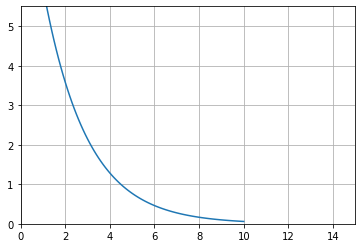

In [2]:
# Import des valeurs de `dt`, `tmax`, `tau` et `E`
from donnees import *

# À vous de jouer pour intégrer l'équation différentielle
# et mettre dans `T` et `Y` les valeurs respectives des temps et 
# des valeurs correspondantes de y



# Si vous avez bien bossé, le graphique suivant devrait vous
# retrouver l'habituelle charge du condensateur initialement déchargé
# dont la charge doit tendre vers $E$.

plt.plot(T, Y)
plt.ylim(0, 1.1*E)
plt.xlim(t0, tmax)
plt.grid()


reponse = 'valeur à t0 + 10*dt', 'valeur à t0 + 200*dt'
